In [173]:
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import time

In [174]:
df=pd.read_csv('basket_analysis.csv')


In [175]:
df = df.drop('Unnamed: 0', axis=1)


In [176]:
print(df.head())
print(df.describe().transpose())
print(df.isnull().sum())

   Apple  Bread  Butter  Cheese   Corn   Dill   Eggs  Ice cream  Kidney Beans  \
0  False   True   False   False   True   True  False       True         False   
1  False  False   False   False  False  False  False      False         False   
2   True  False    True   False  False   True  False       True         False   
3  False  False    True    True  False   True  False      False         False   
4   True   True   False   False  False  False  False      False         False   

    Milk  Nutmeg  Onion  Sugar  Unicorn  Yogurt  chocolate  
0  False   False  False   True    False    True       True  
1   True   False  False  False    False   False      False  
2   True   False  False  False    False    True       True  
3   True    True   True  False    False   False      False  
4  False   False  False  False    False   False      False  
             count unique    top freq
Apple          999      2  False  616
Bread          999      2  False  615
Butter         999      2  False 

In [177]:
apriori_freq_itemsets = apriori(df, min_support=0.2, use_colnames=True)
apriori_rules = association_rules(apriori_freq_itemsets, min_threshold=0.1, num_itemsets=None)
apriori_rules = apriori_rules[apriori_rules['confidence'] > 0.49]
apriori_rules = apriori_rules.reset_index()

In [178]:
fpgrowth_freq_itemsets = fpgrowth(df, min_support=0.2, use_colnames=True)
fpgrowth_rules = association_rules(fpgrowth_freq_itemsets, min_threshold=0.1, num_itemsets=None)
fpgrowth_rules = fpgrowth_rules[fpgrowth_rules['confidence'] > 0.49]
fpgrowth_rules = fpgrowth_rules.reset_index()

In [179]:
print("\nApriori Rules: \n", apriori_rules)
print("\nFPGrowth Rules: \n", fpgrowth_rules)


Apriori Rules: 
    index     antecedents     consequents  antecedent support  \
0      0        (Butter)     (Ice cream)            0.420420   
1      1     (Ice cream)        (Butter)            0.410410   
2      2  (Kidney Beans)        (Butter)            0.408408   
3      6  (Kidney Beans)        (Cheese)            0.408408   
4      7        (Cheese)  (Kidney Beans)            0.404404   
5      9     (Ice cream)     (chocolate)            0.410410   
6     10     (chocolate)          (Milk)            0.421421   
7     11          (Milk)     (chocolate)            0.405405   

   consequent support   support  confidence      lift  representativity  \
0            0.410410  0.207207    0.492857  1.200889               1.0   
1            0.420420  0.207207    0.504878  1.200889               1.0   
2            0.420420  0.202202    0.495098  1.177626               1.0   
3            0.404404  0.200200    0.490196  1.212143               1.0   
4            0.408408  0.20020

In [180]:
start_time = time.time()
apriori_freq_itemsets = apriori(df, min_support=0.2, use_colnames=True)
apriori_rules = association_rules(apriori_freq_itemsets, min_threshold=0.1, num_itemsets=None)
apriori_execution_time = time.time() - start_time

start_time = time.time()
fpgrowth_freq_itemsets = fpgrowth(df, min_support=0.2, use_colnames=True)
fpgrowth_rules = association_rules(fpgrowth_freq_itemsets, min_threshold=0.1, num_itemsets=None)
fpgrowth_execution_time = time.time()  - start_time

In [181]:
print(f"Apriori execution time: {apriori_execution_time:.4f} seconds")
print(f"FPGrowth execution time: {fpgrowth_execution_time:.4f} seconds")


Apriori execution time: 0.0083 seconds
FPGrowth execution time: 0.0659 seconds


In [182]:
def predict_apriori(ruls, k):
    result = set()
    for i in range(len(ruls)):
        antecedents = ruls['antecedents'][i]
        consequents = ruls['consequents'][i]
        if antecedents.issubset(k):
            result.update(consequents)
    result.difference_update(k)
    return result

In [183]:
def predict_fpgrowth(ruls, k):
    result = set()
    for i in range(len(ruls)):
        antecedents = ruls['antecedents'][i]
        consequents = ruls['consequents'][i]
        if antecedents.issubset(k):
            result.update(consequents)
    result.difference_update(k)
    return result

In [184]:
actual_items = {"Butter", "Milk", "Kidney Beans"}

apriori_pred = predict_apriori(apriori_rules, actual_items)
fpgrowth_pred = predict_fpgrowth(fpgrowth_rules, actual_items)

In [185]:
def calculate_accuracy(predicted_items, actual_items):
    TP = len(predicted_items.intersection(actual_items))
    FP = len(predicted_items.difference(actual_items))
    TN = len(actual_items.difference(predicted_items))
    FN = len(actual_items.difference(predicted_items))
    
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    return accuracy

In [186]:
apriori_accuracy = calculate_accuracy(apriori_pred, actual_items)
fpgrowth_accuracy = calculate_accuracy(fpgrowth_pred, actual_items)

# Print the results
print(f"Apriori Prediction: {apriori_pred}")
print(f"FPGrowth Prediction: {fpgrowth_pred}")
print(f"Apriori Accuracy: {apriori_accuracy:.4f}")
print(f"FPGrowth Accuracy: {fpgrowth_accuracy:.4f}")


Apriori Prediction: {'Cheese', 'Ice cream', 'chocolate'}
FPGrowth Prediction: {'Cheese', 'Ice cream', 'chocolate'}
Apriori Accuracy: 0.3333
FPGrowth Accuracy: 0.3333


C:\Users\mmeln\AppData\Local\Temp\ipykernel_8572\3952271917.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=algorithms, y=execution_times, palette="Blues_d")


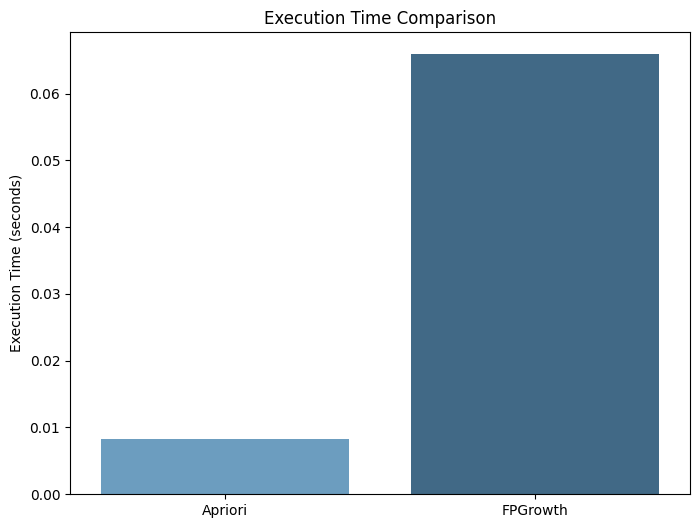

In [187]:
algorithms = ['Apriori', 'FPGrowth']
execution_times = [apriori_execution_time, fpgrowth_execution_time]

plt.figure(figsize=(8, 6))
sns.barplot(x=algorithms, y=execution_times, palette="Blues_d")
plt.title("Execution Time Comparison")
plt.ylabel("Execution Time (seconds)")
plt.show()

C:\Users\mmeln\AppData\Local\Temp\ipykernel_8572\778307142.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=algorithms, y=accuracies, palette="viridis")


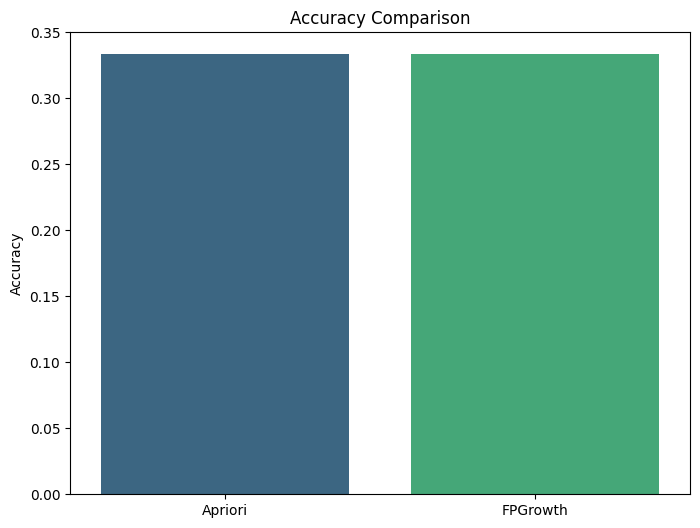

In [188]:
accuracies = [apriori_accuracy, fpgrowth_accuracy]

plt.figure(figsize=(8, 6))
sns.barplot(x=algorithms, y=accuracies, palette="viridis")
plt.title("Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()

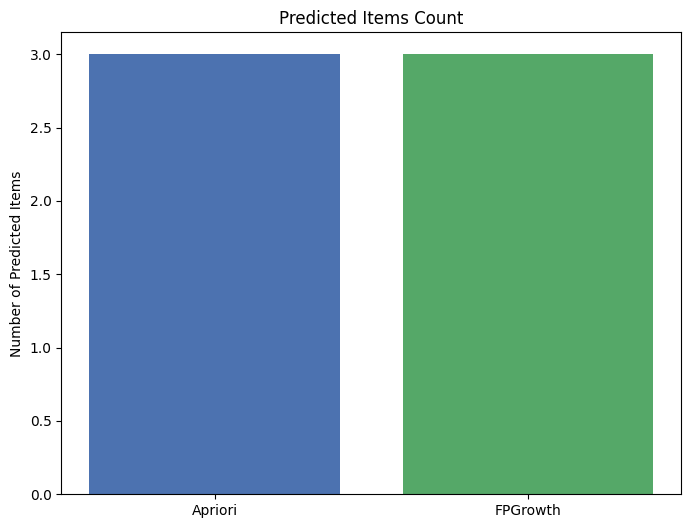

In [189]:
plt.figure(figsize=(8, 6))
labels = ['Apriori', 'FPGrowth']
predictions = [len(apriori_pred), len(fpgrowth_pred)]
plt.bar(labels, predictions, color=['#4C72B0', '#55A868'])
plt.title("Predicted Items Count")
plt.ylabel("Number of Predicted Items")
plt.show()